In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [48]:
data = pd.read_csv("nyra_2019_complete.csv",sep = "," , encoding = "utf-8")
data.head(3)

,track_id,race_date,race_number,program_number,trakus_index,distance_id,distance_id.1,course_type,track_condition,run_up_distance,race_type,post_time,weight_carried,jockey,odds,position_at_finish
0,AQU,1/1/2019,9,6,73,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,1/1/2019,9,6,74,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,1/1/2019,9,6,63,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8


### Data describtion

#### Race Information:

trak_id: Track identifier (e.g., AQU for Aqueduct).
race_date: Date of the race.
race_number: The number of the race on that particular day.
program_number: Program number associated with the horse in the race.
trakus_index: Trakus index associated with the race.


#### Distance and Course Information:

distance_id: Identifier for the distance of the race.
course_type: Type of course (e.g., D for dirt).
track_condition: Condition of the race track (e.g., GD for good).
run_up_distance: Run-up distance for the race.
Race Type and Time:

race_type: Type of race (e.g., CLM for claiming).
post_time: Time when the race is scheduled to start.
Participant Information:

weight_carried: Weight carried by the horse in the race.
jockey: Name of the jockey riding the horse.
odds: Odds associated with the horse.
Additional Identifier:

trac_id: Additional track identifier.

## Analyze the performance of horses over time by looking at their program numbers across different races:


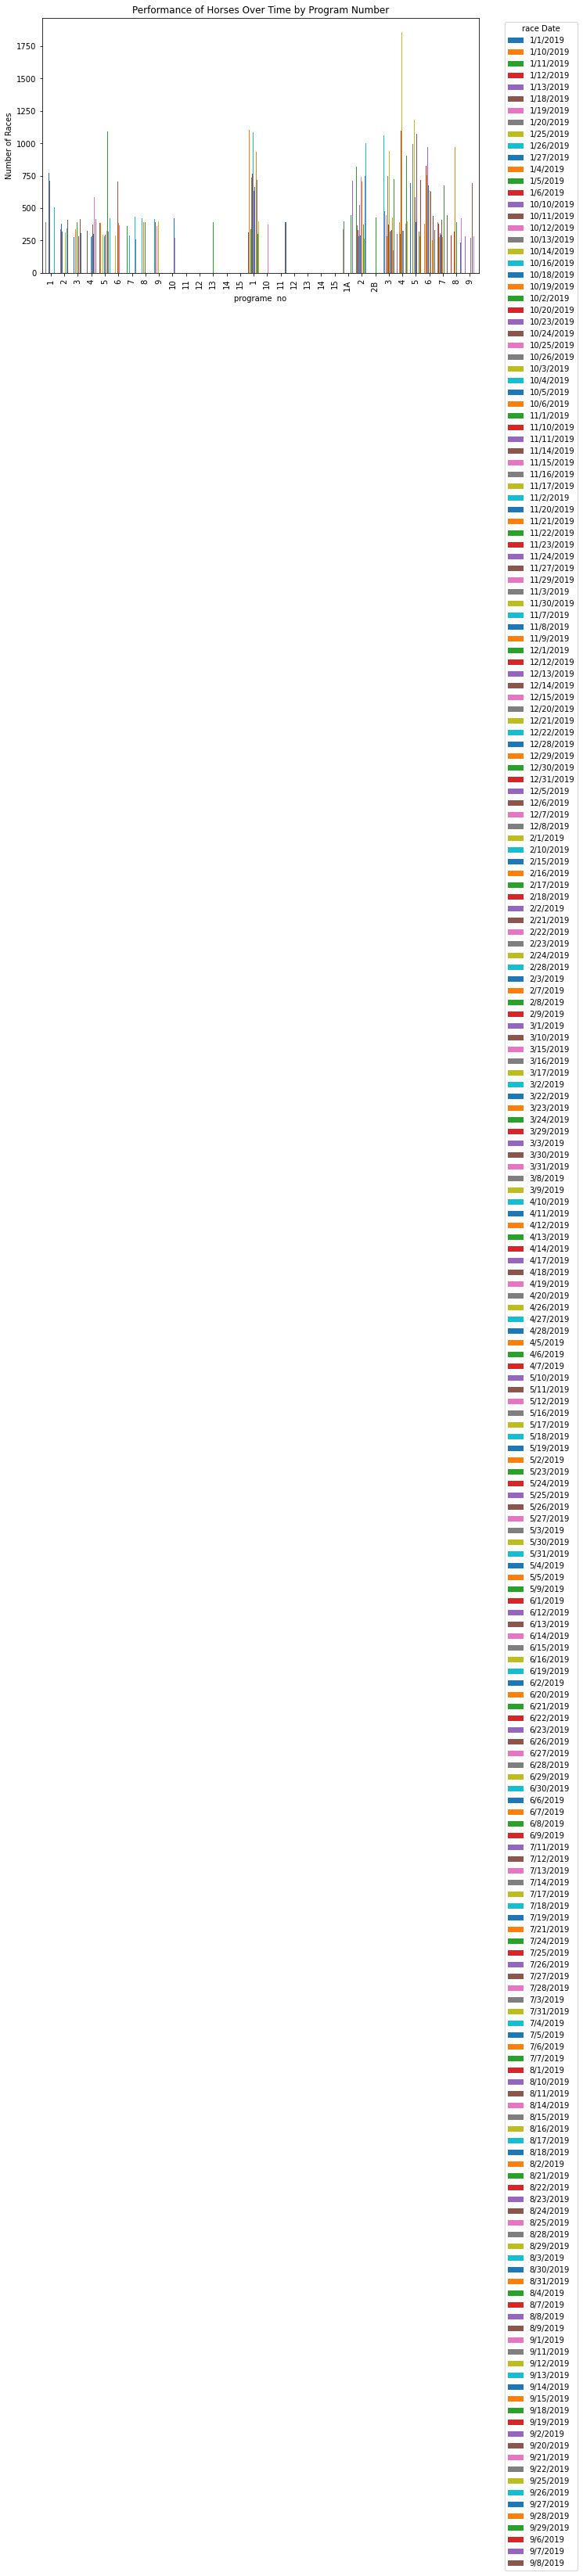

In [49]:
program_counts = data.groupby(['program_number', 'race_date']).size().unstack(fill_value=0)

# Plot the performance of each program number over time using a grouped bar chart
program_counts.plot(kind='bar', width=0.8, figsize=(10, 6))
plt.title('Performance of Horses Over Time by Program Number')
plt.xlabel('programe  no')
plt.ylabel('Number of Races')
plt.legend(title='race Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Identify patterns or trends in the performance of specific  jockeys:

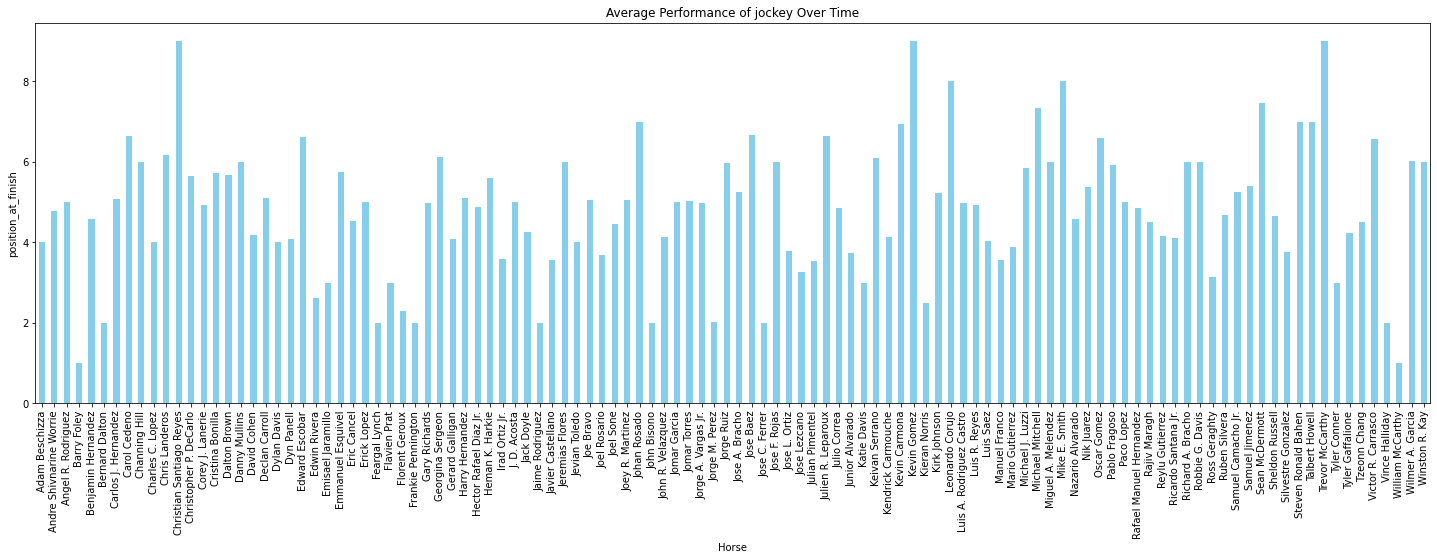

In [50]:
horse_avg_performance = data.groupby('jockey')['position_at_finish'].mean()

# Plot the average performance of each horse over time
horse_avg_performance.plot(kind='bar', color='skyblue', figsize=(25, 7))
plt.title('Average Performance of jockey Over Time')
plt.xlabel('Horse')
plt.ylabel('position_at_finish')
plt.show()

## Examine how  distance impact race outcomes:


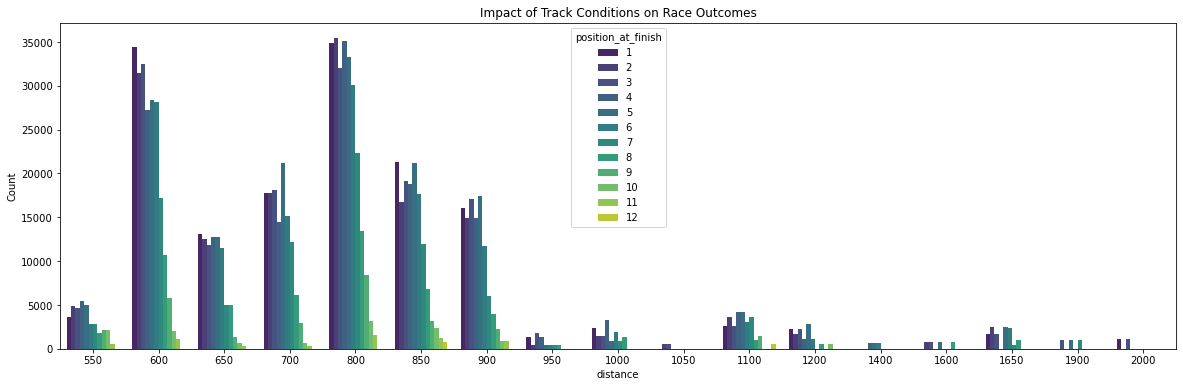

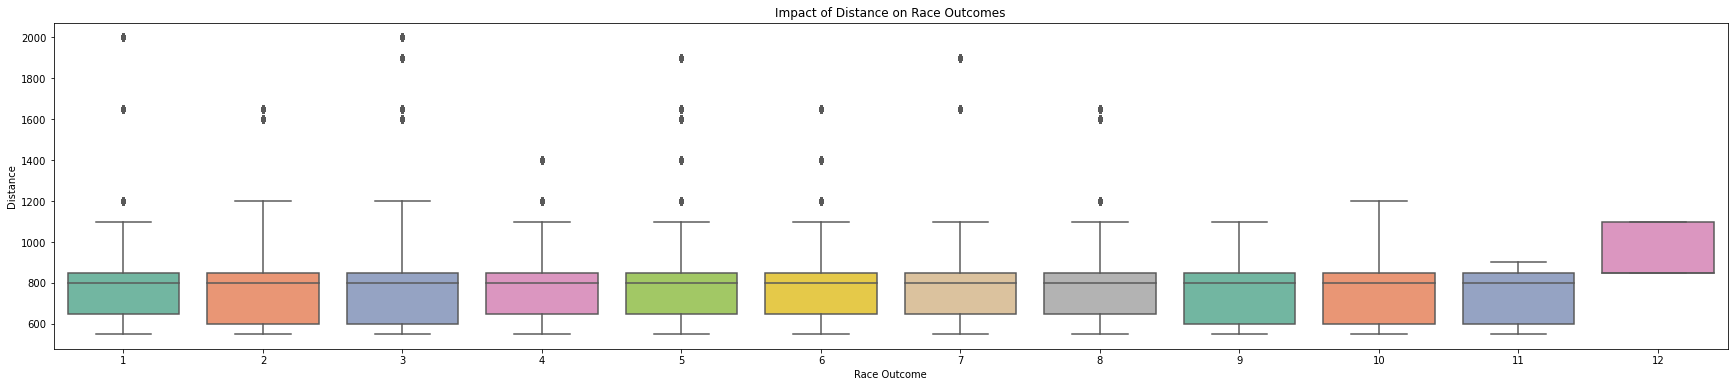

In [60]:

# Create a bar plot to examine the impact of track conditions on race outcomes
plt.figure(figsize=(20, 6))
sns.countplot(x='distance_id', hue='position_at_finish', data=data, palette='viridis')
plt.title('Impact of Track Conditions on Race Outcomes')
plt.xlabel('distance')
plt.ylabel('Count')
plt.show()

# Create a box plot to examine the impact of distance on race outcomes
plt.figure(figsize=(30, 6))
sns.boxplot(x='position_at_finish', y='distance_id', data=data, palette='Set2')
plt.title('Impact of Distance on Race Outcomes')
plt.xlabel('Race Outcome')
plt.ylabel('Distance')
plt.show()


## Study the run-up distance and its correlation with race results:


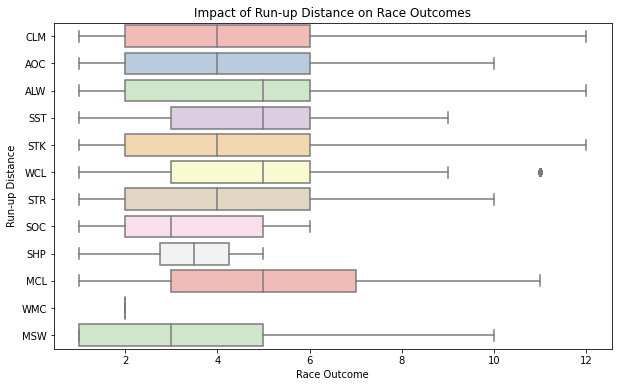

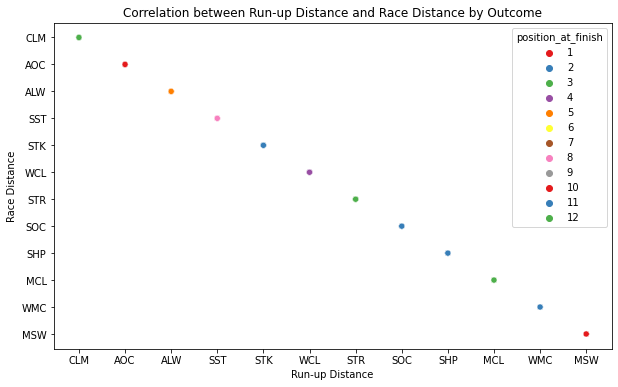

In [57]:
# Assuming 'data' is your DataFrame

# Create a box plot to examine the impact of run-up distance on race outcomes
plt.figure(figsize=(10, 6))
sns.boxplot(x='position_at_finish', y='run_up_distance', data=data, palette='Pastel1')
plt.title('Impact of Run-up Distance on Race Outcomes')
plt.xlabel('Race Outcome')
plt.ylabel('Run-up Distance')
plt.show()

# Create a scatter plot to visualize the correlation between run-up distance and race results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='run_up_distance', y='run_up_distance', hue='position_at_finish', data=data, palette='Set1')
plt.title('Correlation between Run-up Distance and Race Distance by Outcome')
plt.xlabel('Run-up Distance')
plt.ylabel('Race Distance')
plt.show()


In [65]:
jockeys_position_1 = data[data['position_at_finish'] == 1]

# Get the unique jockeys with a position at finish equal to 1
unique_jockeys_position_1 = jockeys_position_1['jockey'].unique()

# Count the number of unique jockeys with a position at finish equal to 1
num_unique_jockeys_position_1 = len(unique_jockeys_position_1)
print(f'Number of unique jockeys with a position at finish equal to 1: {num_unique_jockeys_position_1}')


Number of unique jockeys with a position at finish equal to 1: 42


In [66]:
total_jockeys_position_1 = data[data['position_at_finish'] == 1]['jockey'].count()

print(f'Total number of occurrences where position at finish is equal to 1: {total_jockeys_position_1}')

Total number of occurrences where position at finish is equal to 1: 152437


In [67]:
jockeys_position_1 = data[data['position_at_finish'] == 1]

# Count the occurrences for each jockey with a position at finish equal to 1
jockeys_position_1_count = jockeys_position_1.groupby('jockey').size()

print('Number of times each jockey has position at finish equal to 1:')
print(jockeys_position_1_count)

Number of times each jockey has position at finish equal to 1:
jockey
Andre Shivnarine Worrie      1345
Barry Foley                   844
Benjamin Hernandez           1561
Carlos J. Hernandez          1324
David Cohen                   263
Declan Carroll                322
Dylan Davis                 12856
Edwin Rivera                  764
Eric Cancel                  3846
Hector Rafael Diaz Jr.       1710
Heman K. Harkie               583
Irad Ortiz Jr.              12133
Javier Castellano            5401
Joe Bravo                     422
Joel Rosario                 6130
Joel Sone                     392
Joey R. Martinez             2746
John R. Velazquez            1027
Jorge A. Vargas Jr.           287
Jorge M. Perez                392
Jose L. Ortiz                8997
Jose Lezcano                17780
Julian Pimentel               285
Julio Correa                  410
Junior Alvarado             13951
Kendrick Carmouche           9933
Luis A. Rodriguez Castro      293
Luis R. Reye